# This example shows how to setup a TW accelerating structure from a 1D field map

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

## Load the field map from disk

In [2]:
T = np.loadtxt('data/TWS_Sband.dat')

## Prepares for the RF-Track element
* $E_z$ is the on-axis electric field, in complex form, on a regular 1D mesh
* $h_z$ is the mesh step

In [3]:
Ez = T[:,1]+ 1j*T[:,2] # V/m
hz = T[1,0]-T[0,0] # m

Let's have a look at the field

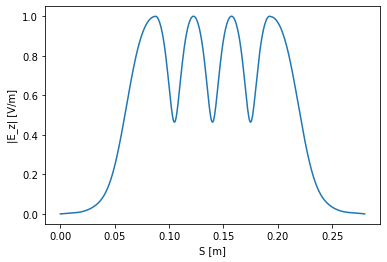

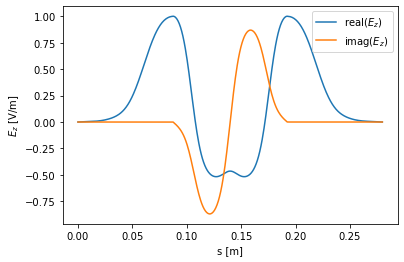

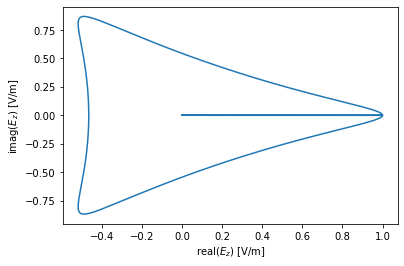

In [4]:
plt.figure()
plt.plot(T[:,0], abs(Ez))
plt.xlabel('S [m]')
plt.ylabel('|E_z| [V/m]')

plt.figure()
plt.plot(T[:,0], Ez.real, label=r'real($E_z$)')
plt.plot(T[:,0], Ez.imag, label=r'imag($E_z$)')
plt.legend()
plt.xlabel('s [m]')
plt.ylabel(r'$E_z$ [V/m]')

plt.figure()
plt.plot(Ez.real, Ez.imag)
plt.xlabel(r'real($E_z$) [V/m]');
plt.ylabel(r'imag($E_z$) [V/m]');

## Create a new element

Now we create a new element to be used for tracking

In [5]:
phid = np.deg2rad(0.0) # degrees
freq = 2.856e9 # Hz

scaling = 1e6

RF = RFT.RF_FieldMap_1d_CINT(scaling * Ez, hz, -1, freq, +1)
RF.set_phid(phid)
RF.set_odeint_algorithm('rk2') # integration algorithm
RF.set_nsteps(1000) # number of integration steps
RF.set_tt_nsteps(100) # transport table

In [6]:
RF.get_length()

0.27982971900000003

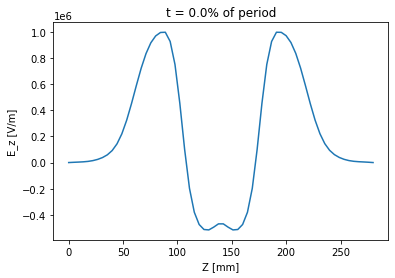

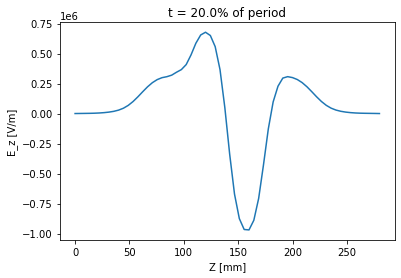

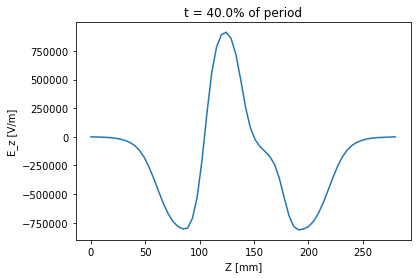

In [7]:
RF.set_t0(0.0)

T_period = RF.get_period() # mm/c

Z = np.linspace(0, RF.get_length()*1e3, 64) # mm
O = np.zeros(Z.size)
I = np.ones(Z.size)

for t in np.array([0.0,0.2,0.4])*T_period:
    # read the field
    E, B = RF.get_field(O, O, Z, t*I)
    # plot the field Ez
    plt.figure()
    plt.plot(Z, E[:, 2])
    plt.title('t = {}% of period'.format(t*100/T_period))
    plt.xlabel('Z [mm]')
    plt.ylabel('E_z [V/m]')

In [8]:
RF.get_field(0, 0, 150, 0.6)

[array([      0.        ,       0.        , -537018.79366221]),
 array([0., 0., 0.])]

## Introducing "autophase"
First, let's define a reference particle

In [9]:
P0 = RFT.Bunch6d(RFT.electronmass, 0.0, -1, np.array([0.0, 0.0, 0.0, 0.0, 0.0, 100.0]).T)

In [10]:
L = RFT.Lattice()
L.append(RF)
L.unset_t0()

Autophase sets the reference time $t_0$ of each RF element such that $\phi_\text{RF}=0$ corresponds to on-crest acceleration

In [11]:
P_final = L.autophase(P0)
print(P_final)

100.1029214120941


In [12]:
P1 = L.track(P0)